# **CSST 106 - EXERCISE 3**

**Name:** Maxyne Nuela Ignacio

**Year & Section:** BS Computer Science- IS -4B

# **Exercise 1: Harris Corner Detection Task:**

Harris Corner Detection is a classic corner detection algorithm. Use the Harris Corner Detection algorithm to detect corners in an image.



*   Load an image of your choice.
*   Convert it to grayscale.

*   Apply the Harris Corner Detection method to detect corners.
*   Visualize the corners on the image and display the result.


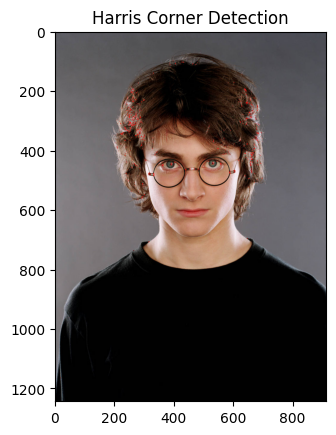

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image and convert to grayscale
image = cv2.imread('image01.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Harris Corner Detection
gray = np.float32(gray)
dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

# Mark corners on the image
image[dst > 0.01 * dst.max()] = [0, 0, 255]  # marking corners in red

# Display result
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Harris Corner Detection")
plt.show()


# **Exercise 2: HOG (Histogram of Oriented Gradients) Feature Extraction Task: **

The HOG descriptor is widely used for object detection, especially in human detection.



*   Load an image of a person or any object.
*   Convert the image to grayscale.

*   Apply the HOG descriptor to extract features.
*   Visualize the gradient orientations on the image.

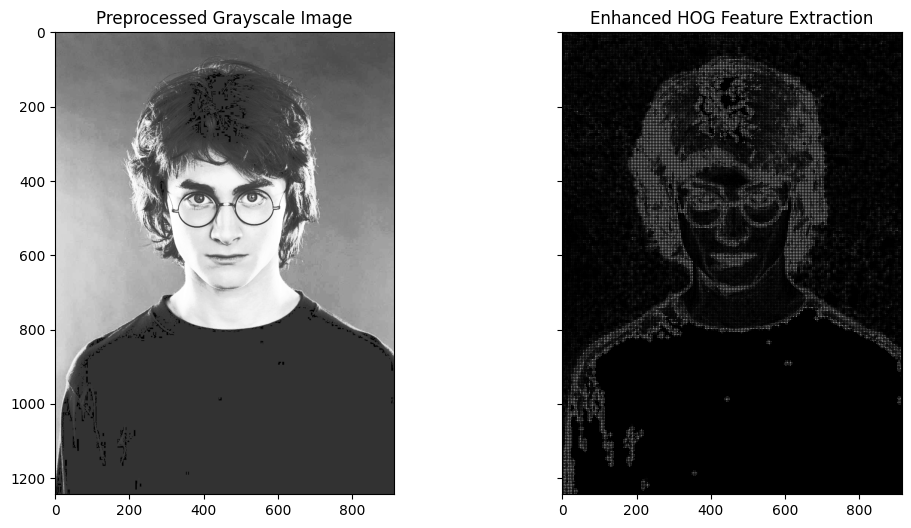

In [15]:
from skimage.feature import hog
from skimage import exposure
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and convert the image to grayscale
image = cv2.imread('image01.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply histogram equalization for better contrast
gray = cv2.equalizeHist(gray)

# Apply gamma correction
gamma = 1.5
look_up_table = np.array([((i / 255.0) ** gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
gray = cv2.LUT(gray, look_up_table)

# Extract HOG features with enhanced parameters
hog_features, hog_image = hog(
    gray,
    orientations=12,           # More orientations
    pixels_per_cell=(4, 4),     # Smaller cells for finer detail
    cells_per_block=(3, 3),     # Larger blocks for robust features
    visualize=True,
    block_norm='L2-Hys'
)

# Enhance visualization by scaling the intensity of the HOG image
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Display the original and HOG image
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
ax[0].imshow(gray, cmap="gray")
ax[0].set_title("Preprocessed Grayscale Image")
ax[1].imshow(hog_image_rescaled, cmap="gray")
ax[1].set_title("Enhanced HOG Feature Extraction")
plt.show()



# **Exercise 3: FAST (Features from Accelerated Segment Test) Keypoint Detection **

FAST is another keypoint detector known for its speed.


*   Load an image.
*   Convert the image to grayscale.

*   Apply the FAST algorithm to detect keypoints.
*   Visualize the keypoints on the image and display the result.


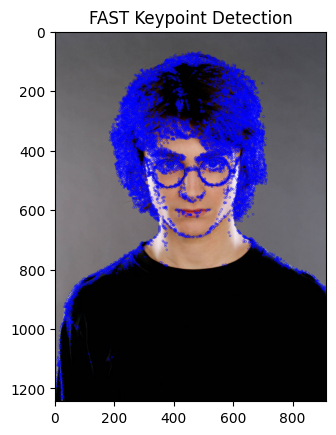

In [ ]:
# Load and convert image to grayscale
image = cv2.imread('image01.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply FAST detector
fast = cv2.FastFeatureDetector_create()
keypoints = fast.detect(gray, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, color=(255, 0, 0))

# Display result
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title("FAST Keypoint Detection")
plt.show()

# **Exercise 4: Feature Matching using ORB and FLANN Task: **

Use ORB descriptors to find and match features between two images using FLANN-based matching.


*   Load two images of your choice.
*   Extract keypoints and descriptors using ORB.
*   Match features between the two images using the FLANN matcher.
*   Display the matched features.

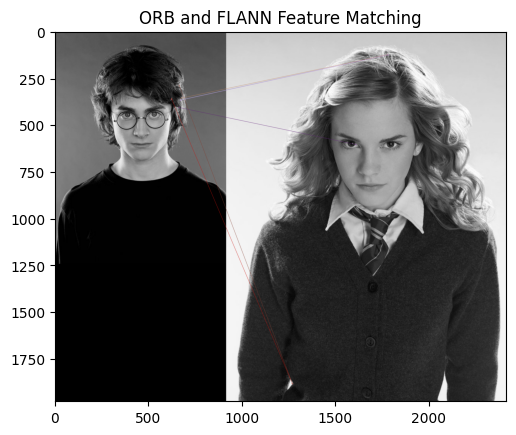

In [ ]:
# Load the two images
img1 = cv2.imread('image01.jpg', 0)
img2 = cv2.imread('image02.jpg', 0)

# Detect ORB keypoints and descriptors
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# FLANN parameters
FLANN_INDEX_LSH = 6
index_params = dict(algorithm=FLANN_INDEX_LSH, table_number=6, key_size=12, multi_probe_level=1)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

# Apply ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

# Draw matches
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display result
plt.imshow(img_matches)
plt.title("ORB and FLANN Feature Matching")
plt.show()


# **Exercise 5: Image Segmentation using Watershed Algorithm Task: **

The Watershed algorithm segments an image into distinct regions.


*   Load an image.
*   Apply a threshold to convert the image to binary.
*   Apply the Watershed algorithm to segment the image into regions.
*  Visualize and display the segmented regions.

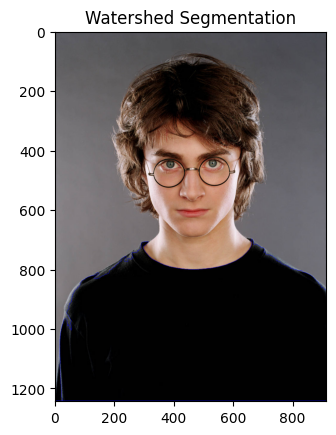

In [16]:
# Load image
image = cv2.imread('image01.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply binary threshold
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Noise removal with morphological operations
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

# Background and foreground separation
sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Watershed marker
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# Apply Watershed
markers = cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]  # marking boundaries in red

# Display result
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Watershed Segmentation")
plt.show()